Importáljuk a drive-ot

In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Megnyitjuk az adatb.csv nevű adatbázisunkat, és kiiratjuk első pár sorát

In [4]:
import io
adf = pd.read_csv('/content/drive/My Drive/adatb.csv', error_bad_lines = False, encoding='iso-8859-1', delimiter=";")
adf.head(10)

,trackid,genre_top,genre,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,chroma_cens.10,chroma_cens.11,chroma_cens.12,chroma_cens.13,chroma_cens.14,chroma_cens.15,chroma_cens.16,chroma_cens.17,chroma_cens.18,chroma_cens.19,chroma_cens.20,chroma_cens.21,chroma_cens.22,chroma_cens.23,chroma_cens.24,chroma_cens.25,chroma_cens.26,chroma_cens.27,chroma_cens.28,chroma_cens.29,chroma_cens.30,chroma_cens.31,chroma_cens.32,chroma_cens.33,chroma_cens.34,chroma_cens.35,...,tonnetz.9,tonnetz.10,tonnetz.11,tonnetz.12,tonnetz.13,tonnetz.14,tonnetz.15,tonnetz.16,tonnetz.17,tonnetz.18,tonnetz.19,tonnetz.20,tonnetz.21,tonnetz.22,tonnetz.23,tonnetz.24,tonnetz.25,tonnetz.26,tonnetz.27,tonnetz.28,tonnetz.29,tonnetz.30,tonnetz.31,tonnetz.32,tonnetz.33,tonnetz.34,tonnetz.35,tonnetz.36,tonnetz.37,tonnetz.38,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,2,21,21,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,1.347792,1.237658,0.692500,0.569344,0.597041,0.625864,0.567330,0.443949,0.487976,0.497327,0.574435,0.579241,0.620102,0.586945,0.474300,0.369816,0.236119,0.228068,0.222830,0.221415,0.229238,0.248795,0.196245,0.175809,0.200713,0.319972,0.482825,...,0.059690,0.069184,-0.002570,0.019296,0.010510,0.073464,0.009272,0.015765,-0.003789,0.017786,0.007311,0.067945,0.009488,0.016876,-0.059769,-0.091745,-0.185687,-0.140306,-0.048525,-0.089286,0.752462,0.262607,0.200944,0.593595,-0.177665,-1.424201,0.019809,0.029569,0.038974,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,NaN
1,5,21,21,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,0.268932,1.125141,0.611014,0.651471,0.494528,0.448799,0.468624,0.454021,0.497172,0.559755,0.671287,0.610565,0.551663,0.603413,0.258420,0.303385,0.250737,0.218562,0.245743,0.236018,0.275766,0.293982,0.346324,0.289821,0.246368,0.220939,0.255472,...,0.072169,0.076847,-0.007501,-0.018525,-0.030318,0.024743,0.004771,-0.004536,-0.007385,-0.018953,-0.020358,0.024615,0.004868,-0.003899,-0.128391,-0.125289,-0.359463,-0.166667,-0.038546,-0.146136,1.212025,0.218381,-0.419971,-0.014541,-0.199314,-0.925733,0.025550,0.021106,0.084997,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,NaN
2,20,10,76,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,-0.804761,-0.990958,-0.430381,0.652864,0.676290,0.670288,0.598666,0.653607,0.697645,0.664929,0.686563,0.635117,0.667393,0.689589,0.683196,0.202806,0.245125,0.262997,0.187961,0.182397,0.238173,0.278600,0.292905,0.247150,0.292501,0.304655,0.235177,0.200830,...,0.097534,0.072202,0.012362,0.012246,-0.021837,-0.075866,0.006179,-0.007771,0.011057,0.012416,-0.025059,-0.072732,0.005057,-0.006812,-0.147339,-0.210110,-0.342446,-0.388083,-0.075566,-0.091831,0.192395,-0.215337,0.081732,0.040777,0.232350,-0.207831,0.033342,0.035174,0.105521,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993,NaN
3,142,17,17,-0.581270,3.199484,1.298346,-0.681253,-0.935093,-0.960304,-0.748014,-0.715798,-0.905853,-0.798362,-0.550041,-0.857097,0.593374,0.626720,0.534311,0.545197,0.586780,0.672797,0.696612,0.688545,0.661992,0.652306,0.709119,0.711193,0.238865,0.115562,0.111740,0.108569,0.180331,0.288104,0.327774,0.267151,0.221668,0.223882,0.362643,0.375383,0.233194,...,0.087732,0.067426,-0.008304,0.002772,0.055882,-0.064838,-0.011640,-0.011450,-0.006852,0.001937,0.024436,-0.053525,-0.011911,-0.008733,-0.133014,-0.140619,-0.264650,-0.447757,-0.093297,-0.108809,-0.071473,0.270580,0.623331,-0.584363,0.450577,-0.527584,0.036863,0.032179,0.122577,0.086817,0.021360,0.022975,4.865969,0.309570,0.066520,0.061035,0.001953,1.625022,0.036644,NaN
4,145,4,4,0.954054,0.315324,0.015383,-0.023933,0.086671,1.279086,1.966359,0.517441,0.372864,1.281306,1.651671,1.251035,0.615185,0.697858,0.69

genre_top a 16-os célváltozók, genre a 163-os célváltozók, a zcr.6-ban NaN elemek vannak, úgyhogy azt is kidobtuk 

Döntési fa

In [5]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = adf.genre_top
z = adf.genre
x = adf.drop(['genre_top','genre','zcr.6'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.3, random_state=2)

#stackoverflow azt mondta ez kell: 
np.asarray(x)
np.asarray(y)
np.asarray(z)

array([21, 21, 76, ..., 25, 25, 25])

Mivel javítsunk rajt?
Döntési fákat építünk, legjobban osztályozót kiválasztjuk a min_samples_leaf alapján

In [6]:
model = tree.DecisionTreeClassifier(min_samples_leaf=170)
model = model.fit(x_train, y_train)
y_test_model = model.predict(x_test)
print(accuracy_score(y_test, y_test_model))
model = model.fit(x_train, z_train)
z_test_model = model.predict(x_test)
print(accuracy_score(z_test, z_test_model))

0.37939632545931756
0.22335958005249343


In [0]:
accy = 0
accz = 0
yi = 0
zi = 0

for i in range (100, 200, 10):
  model = tree.DecisionTreeClassifier(min_samples_leaf=i)
  model = model.fit(x_train, y_train)
  y_test_model = model.predict(x_test)
  
  if accuracy_score(y_test, y_test_model) > accy:
    accy = accuracy_score(y_test, y_test_model)
    yi = i
  
  model = model.fit(x_train, z_train)
  z_test_model = model.predict(x_test)
  
  if accuracy_score(z_test, z_test_model) > accz:
    accz =accuracy_score(z_test, z_test_model)
    zi = i

In [8]:
print(accy)
print(accz)
print(yi)
print(zi)

0.38438320209973753
0.23083989501312335
130
100


In [9]:
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)
y_train_model = model.predict(x_train)
print(accuracy_score(y_train, y_train_model))
model = model.fit(x_train, z_train)
z_train_model = model.predict(x_train)
print(accuracy_score(z_train, z_train_model))


1.0
1.0


kNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=100, weights='distance')
knn_model.fit(x_train, y_train)
y_test_model = knn_model.predict(x_test)
print(accuracy_score(y_test, y_test_model))

knn_model.fit(x_train, z_train)
z_test_model = knn_model.predict(x_test)
print(accuracy_score(z_test, z_test_model))

0.36719160104986875
0.24816272965879266


In [0]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

accs_y = []
accs_z = []
n_y = []
n_z = []
for i in range(1,100):
  
  knn_model = KNeighborsClassifier(n_neighbors=i, weights='distance')

  knn_model.fit(x_train, y_train)
  y_test_model = knn_model.predict(x_test)
  accs_y.append(accuracy_score(y_test, y_test_model))
  n_y.append(i)
  
  knn_model.fit(x_train, z_train)
  z_test_model = knn_model.predict(x_test)
  accs_z.append(accuracy_score(z_test, z_test_model))
  n_z.append(i)
  
plt.plot(n_y,accs_y) 
plt.plot(n_z,accs_z)


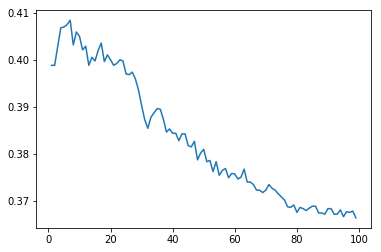

In [0]:
plt.plot(n_y,accs_y)

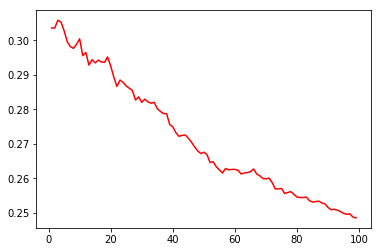

In [0]:
plt.plot(n_z,accs_z, c = 'r')

Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150, random_state=0)
rfc.fit(x_train, y_train) 
y_test_model = rfc.predict(x_test)
print(accuracy_score(y_test, y_test_model))

rfc.fit(x_train, z_train)
z_test_model = rfc.predict(x_test)
print(accuracy_score(z_test, z_test_model))

0.4687664041994751
0.3069553805774278


DBSCAN

In [0]:
from sklearn.cluster import DBSCAN

x = StandardScaler().fit_transform(x)
dbscan = DBSCAN(eps = 0.3, min_samples = 4)
model = dbscan.fit(x)
labels = model.labels_

In [49]:
core_samples = np.zeros_like(labels, dtype = bool)

core_samples[dbscan.core_sample_indices_] = True
print(core_samples)

[False False False ... False False False]


In [50]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

7

In [51]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x,labels))

Silhouette Coefficient: 0.022
